In [1]:
from sklearn.datasets import load_iris, load_wine, load_digits
import pandas as pd

# 加载鸢尾花数据集
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 加载葡萄酒数据集
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# 加载手写数字数据集
digits = load_digits()
digits_df = pd.DataFrame(data=digits.data)
digits_df['target'] = digits.target

In [ ]:
# 使用 scikit-learn 实现 KMeans 聚类
# 导入必要的库
import numpy as np  # 导入 NumPy 库，用于数值计算
from sklearn.cluster import KMeans  # 从 scikit-learn 库中导入 KMeans 聚类算法
from sklearn.datasets import load_iris  # 从 scikit-learn 库中导入 load_iris 函数，用于加载鸢尾花数据集
from sklearn.manifold import TSNE  # 从 scikit-learn 库中导入 TSNE，用于降维
import matplotlib.pyplot as plt  # 导入 Matplotlib 库，用于数据可视化
from scipy.spatial.distance import cdist  # 从 SciPy 库中导入 cdist 函数，用于计算距离
import warnings  # 导入 warnings 库，用于忽略警告
from sklearn.decomposition import PCA #导入pca
from sklearn import datasets, metrics

# 设置 Matplotlib 字体以避免字体缺失的警告
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 加载数据集
# 加载鸢尾花数据集
X = load_iris().data  # 加载鸢尾花数据集的特征数据
y_true = load_iris().target  # 加载鸢尾花数据集的目标标签

# 使用肘部法则确定最佳的 K 值
K = range(1, 10)  # 选择 K 的范围
meandistortions = []  # 存储每个 K 值对应的平均畸变程度
# 存放设置不同簇数时的SSE值
see_list = []
# 轮廓系数
silhouettes = []


K=3时，轮廓系数=0.460
K=4时，轮廓系数=0.387
K=5时，轮廓系数=0.346
K=6时，轮廓系数=0.317
K=7时，轮廓系数=0.320
K=8时，轮廓系数=0.339
K=9时，轮廓系数=0.342


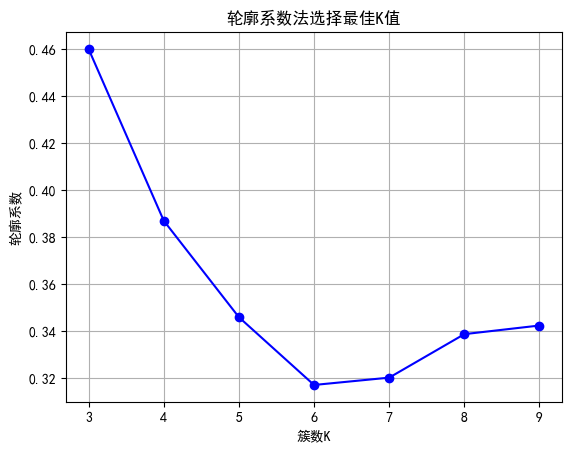

最优簇数：K=3


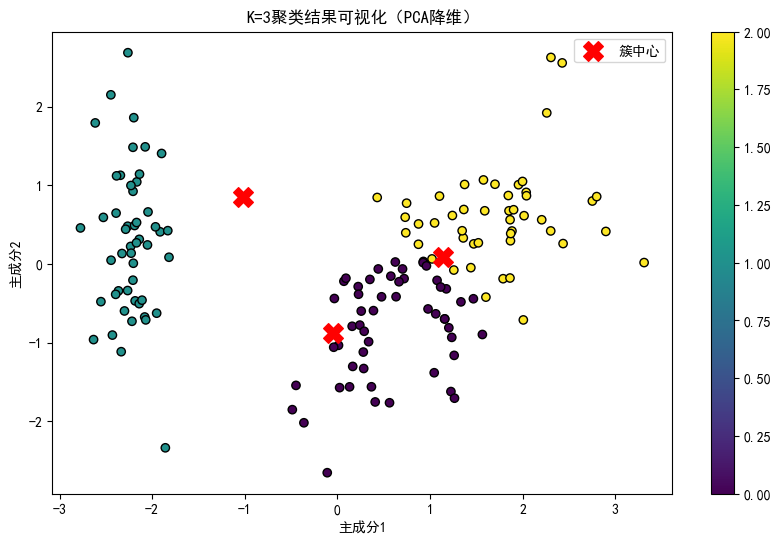

In [ ]:
# 导入所需库
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings

# 忽略警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 设置 Matplotlib 字体以避免字体缺失的警告
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 使用全部4个特征
y_true = iris.target

# 数据标准化（提升聚类效果）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 遍历不同K值计算轮廓系数
silhouette_scores = []
k_range = range(2, 10)  # 探索K=2到K=5的情况

for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}时，轮廓系数={score:.3f}")

# 绘制轮廓系数变化图
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('簇数K')
plt.ylabel('轮廓系数')
plt.title('轮廓系数法选择最佳K值')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 选择最优K值
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"最优簇数：K={best_k}")

# 最终聚类模型训练
final_model = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_model.fit_predict(X_scaled)

# 可视化聚类结果（PCA降维）
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=final_labels, cmap='viridis', edgecolor='k')
plt.scatter(final_model.cluster_centers_[:,0], final_model.cluster_centers_[:,1], 
            marker='X', s=200, c='red', label='簇中心')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title(f'K={best_k}聚类结果可视化（PCA降维）')
plt.legend()
plt.colorbar(scatter)
plt.show()

K-Means training time: 0.1288 seconds, Inertia: 5971.654570170743
Mini Batch K-Means training time: 0.1791 seconds, Inertia: 5973.389892328276


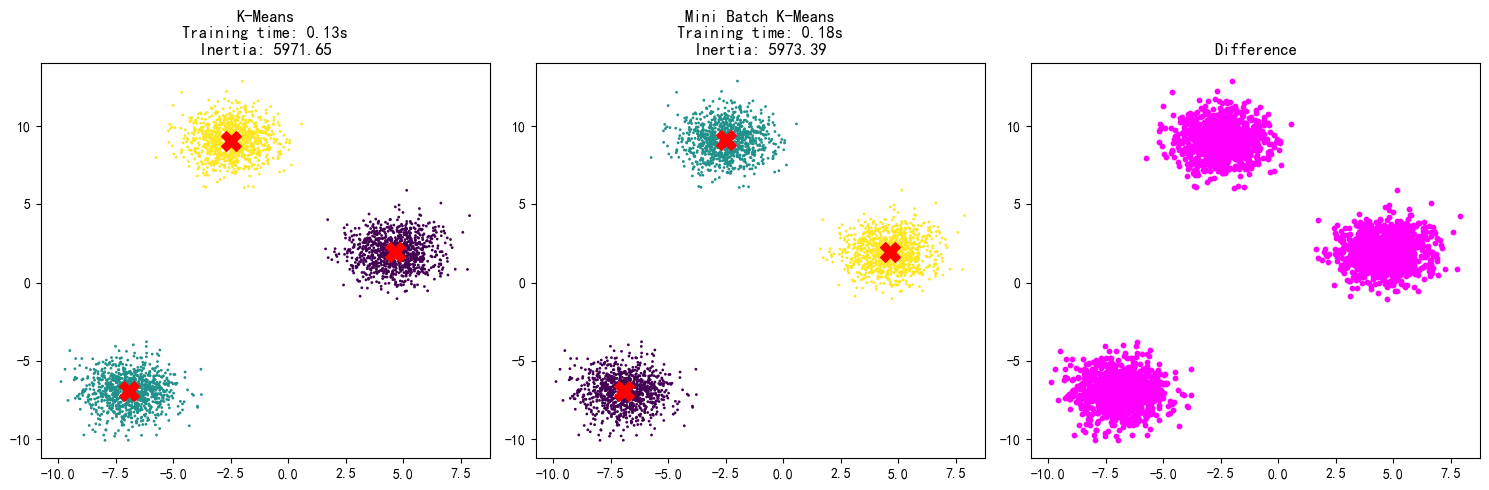

In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=3000, centers=3, cluster_std=1.0, random_state=42)

# Set the number of clusters
n_clusters = 3

# K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
start_time = time.time()
kmeans.fit(X)
kmeans_time = time.time() - start_time
kmeans_inertia = kmeans.inertia_

# Mini Batch K-Means clustering
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, random_state=42)
start_time = time.time()
minibatch_kmeans.fit(X)
minibatch_kmeans_time = time.time() - start_time
minibatch_kmeans_inertia = minibatch_kmeans.inertia_

# Print results comparison
print(f"K-Means training time: {kmeans_time:.4f} seconds, Inertia: {kmeans_inertia}")
print(f"Mini Batch K-Means training time: {minibatch_kmeans_time:.4f} seconds, Inertia: {minibatch_kmeans_inertia}")

# Visualize the clustering results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Left plot: K-Means
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=1, cmap='viridis')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
ax[0].set_title(f"K-Means\nTraining time: {kmeans_time:.2f}s\nInertia: {kmeans_inertia:.2f}")

# Middle plot: Mini Batch K-Means
ax[1].scatter(X[:, 0], X[:, 1], c=minibatch_kmeans.labels_, s=1, cmap='viridis')
ax[1].scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
ax[1].set_title(f"Mini Batch K-Means\nTraining time: {minibatch_kmeans_time:.2f}s\nInertia: {minibatch_kmeans_inertia:.2f}")

# Right plot: Difference
# Highlight points assigned to different clusters by the two methods
diff_labels = kmeans.labels_ != minibatch_kmeans.labels_
ax[2].scatter(X[:, 0], X[:, 1], c='lightgrey', s=1)
ax[2].scatter(X[diff_labels, 0], X[diff_labels, 1], c='magenta', s=10)
ax[2].set_title("Difference")

plt.tight_layout()
plt.show()